<a href="https://colab.research.google.com/github/zakariajaadi/data-science-portofolio/blob/main/Gradient%20Descent%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook provides a visual demonstration of the gradient descent algorithm, a fundamental optimization technique widely used in machine learning. We'll visualize the *iterative steps* of gradient descent as it minimizes a simple quadratic function, f(x) = x², by adjusting the parameter x. This visualization will help build intuition for how the algorithm navigates the function's landscape to find its minimum.

## 1. The Function: $f(x) = x^2$

Our goal is to find the minimum value of the function:

$$f(x) = x^2$$

To do this with gradient descent, we'll need the derivative:

$$f'(x) = \frac{\partial f}{\partial x} = 2x$$

This function, when plotted, forms a parabola—a U-shaped curve.  The minimum value we're looking for is located at the bottom of this U (at $x=0$) also know as the vertex

## 2. The Gradient Descent Algorithm (Step by Step)

### How does it work ?

*   Gradient descent is an iterative algorithm designed to minimize a function. Minimizing a function means finding the parameters that produce the smallest possible output. In our example, the function is $f(x) = x^2$, and the parameter we want to find is $x$, which will minimize the function.

*   Gradient descent requires an initial starting point for the parameters. It begins by choosing initial values for the parameters. From there, it moves towards the minimum by iteratively adjusting the parameter values in the direction that reduces the function’s output. In our example, we have a single parameter $x$, and the idea is to start with some value for $x$ and adjust it iteratively in the direction that minimizes the function $f(x)$.

### But, how does gradient descent know the direction towards the minimum ?🤔

*   At its name suggets, it calculates the *gradient* of the function. The gradient is a vector containing the *derivatives of the function with respect to its parameters*. At any given point, the gradient indicates the direction of the steepest *increase* of the function ↗️. Gradient descent then moves in the *opposite* direction of the gradient to find the minimum ↘️.

*   💡 **Think of it like this:** Imagine you're standing on a hill, and you want to find the fastest way down. The gradient is like a signpost that points directly *uphill*. Since you want to go *down*, you should move in the *opposite* direction of the signpost.

### How does Gradient Descent move in the opposite direction of the Gradient? 🤔

Gradient descent follows a simple update rule:

$$
x_{\text{new}} = x_{\text{old}} - \eta \cdot f'(x_{\text{old}})
$$

Where:

*   $x_{\text{new}}$ is the updated value of $x$.
*   $x_{\text{old}}$ is the current value of $x$.
*   $\eta$ (eta) is the *learning rate*. This is a positive scalar that controls the step size.

The term $\eta \cdot f'(x_{\text{old}})$ represents the step size.  The *minus sign* in the update rule is what makes us move in the *opposite* direction of the gradient. We subtract this step size from the current value of x to get the new value. This process is repeated until we reach the minimum

#### Finishing with the Role of the Learning Rate
The learning rate $\eta$ determines how large each step is:

✔️ If it's too high, we risk overshooting the minimum, and oscillate around it or even diverge.

✔️ If it's too low, convergence can be very slow, and we might get stuck in a local minimum

In most machine learning algorithms, the learning rate is a hyperparameter that is set prior to training and can be learned through experimentation and tuning

# Implementing and visulazing Gradient Descent

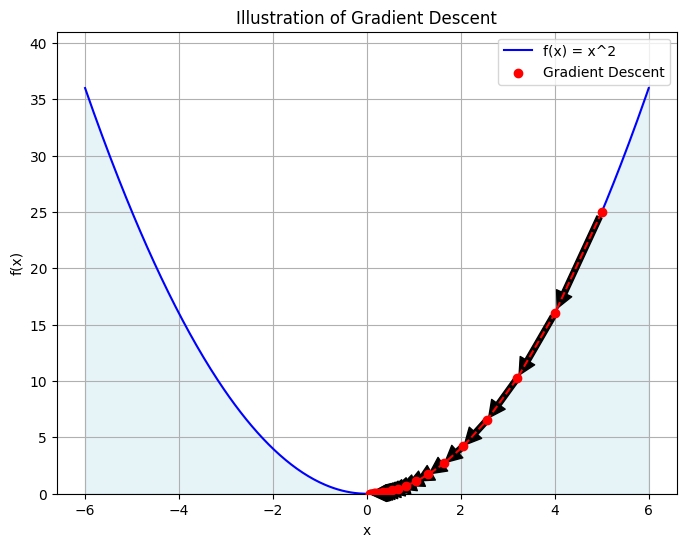

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Quadratic function f(x) = x^2
def f(x):
    return x**2

# Derivative of the function f(x) (gradient)
def df(x):
    return 2*x

# Gradient descent parameters
learning_rate = 0.1
iterations = 20
x_start = 5  # starting point

# List to store x values during the execution of gradient descent
x_values = [x_start]

# Gradient Descent
x = x_start
for _ in range(iterations):
    x = x - learning_rate * df(x)  # update of x
    x_values.append(x)

# Plotting the function and the steps of gradient descent
x_range = np.linspace(-6, 6, 400)
y_range = f(x_range)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Colored background with the function f(x)
ax.plot(x_range, y_range, label="f(x) = x^2", color="blue")
ax.fill_between(x_range, y_range, color="lightblue", alpha=0.3)

# Display the steps of gradient descent
ax.scatter(x_values, f(np.array(x_values)), color="red", label="Gradient Descent", zorder=5)
ax.plot(x_values, f(np.array(x_values)), color="red", linestyle="--", zorder=4)

# Add arrows for each update of x
for i in range(1, len(x_values)):
    ax.annotate('', xy=(x_values[i], f(x_values[i])), xytext=(x_values[i-1], f(x_values[i-1])),
                arrowprops=dict(facecolor='black', shrink=0.05))

# Add contour lines (optional, but aesthetic)
ax.set_ylim(0, max(y_range) + 5)

# Titles and labels
ax.set_title("Illustration of Gradient Descent")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the figure
plt.show()


**Why Does Gradient Descent Take Large Steps at the Beginning and Baby Steps at the End?**

At the start of the algorithm, large input variables lead to large derivatives, which result in a large gradient. This large gradient causes the algorithm to take large steps. As the algorithm progresses, the input variables, derivatives, and gradient all become smaller, leading to smaller steps. This automatic adjustment of step size, based on the gradient, is what allows gradient descent to efficiently find the minimum.

# Bonus: Interactive Visualization 🎉📊

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Quadratic function f(x) = x^2
def f(x):
    return x**2

# Derivative of the function f(x) (gradient)
def df(x):
    return 2*x

# Gradient descent parameters
learning_rate = 0.1
iterations = 20
x_start = 5  # starting point

# List to store x values during the execution of gradient descent
x_values = [x_start]

# Gradient Descent
x = x_start
for _ in range(iterations):
    x = x - learning_rate * df(x)  # update x
    x_values.append(x)

# Plot the function and the steps of gradient descent
x_range = np.linspace(-6, 6, 400)
y_range = f(x_range)

# Create an interactive figure with Plotly
fig = go.Figure()

# Add the curve of the function f(x) = x^2
fig.add_trace(go.Scatter(x=x_range, y=y_range, mode='lines', name='f(x) = x²', line=dict(color='blue')))

# Show the steps of gradient descent
fig.add_trace(go.Scatter(x=x_values, y=f(np.array(x_values)), mode='markers+lines', name='Gradient Descent', line=dict(color='red', dash='dash'), marker=dict(color='red', size=8)))

# Add arrows for each update of x
for i in range(1, len(x_values)):
    fig.add_annotation(
        x=x_values[i], y=f(x_values[i]),
        ax=x_values[i-1], ay=f(x_values[i-1]),
        axref="x", ayref="y", xref="x", yref="y",
        showarrow=True, arrowhead=3, arrowsize=1.5, arrowcolor='black'
    )

# Customize the axes and title
fig.update_layout(
    title="Interactive Gradient Descent Visualization",
    title_x=0.45,  # Center the title

    xaxis_title="x",
    yaxis_title="f(x)",
    showlegend=True,
    width=800,   # Width
    height=600
)

# Display the interactive graph
fig.show()
